# Approach
### 1. Data cleaning/ Pre-Processing
### 2. Exploratory Data Analysis
### 3. Modelling 

***

# Importing suitable libraries

In [475]:
import numpy as np # math lol
import pandas as pd # data processing, like-file I/O
import matplotlib.pyplot as plt
# will import further when needed

In [476]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
train_data = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [477]:
# checking whether data read or not correctly
# pandas head is used to return top n (5 by default) rows of a data
print(len(train_data))
train_data.head() 

8693


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.00,False,0.00,0.00,0.00,0.00,0.00,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.00,False,109.00,9.00,25.00,549.00,44.00,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.00,True,43.00,3576.00,0.00,6715.00,49.00,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.00,False,0.00,1283.00,371.00,3329.00,193.00,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.00,False,303.00,70.00,151.00,565.00,2.00,Willy Santantines,True


***
# **1. DATA CLEANING/ PRE-PROCESSING**
* Filling none,blank,empty values.
* Encoding
* Scaling
* Splitting datasets
* Checking accuracies with different models to choose one
***

In [478]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


### Which data is categorical and which is numerical

In [479]:
print("** CATEGORICAL DATA **")
categorical = train_data.select_dtypes(include=['object']).columns
for col in categorical:
    print(col)

** CATEGORICAL DATA **
PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


In [480]:
print("** NUMERICAL DATA **")
numerical = train_data._get_numeric_data().columns
for col in numerical:
    print(col)

** NUMERICAL DATA **
Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck
Transported


### Finding null values

In [481]:
# Iterating over the columns and printing the percentage of null values present in train_data
for col in train_data.columns:
    percent = str((100 * train_data[col].isnull().sum()/len(train_data))) + "%"
    print(col,percent)

PassengerId 0.0%
HomePlanet 2.312205222592891%
CryoSleep 2.496261359714713%
Cabin 2.289198205452663%
Destination 2.093638559760727%
Age 2.0591280340503855%
VIP 2.3352122397331185%
RoomService 2.082135051190613%
FoodCourt 2.105142068330841%
ShoppingMall 2.392729782583688%
Spa 2.105142068330841%
VRDeck 2.1626596111814105%
Name 2.300701714022777%
Transported 0.0%


### Methods to handle null values in data
1. Remove all rows with null value in it.
2. Fill them with mean/median/mode.

In [482]:
"""
REMOVING ROWS
for col in train_data.columns:
    train_data.dropna(subset=[col], inplace=True)
print(len(train_data))
"""

'\nREMOVING ROWS\nfor col in train_data.columns:\n    train_data.dropna(subset=[col], inplace=True)\nprint(len(train_data))\n'

We'll go with filling them with mean/median/mode(for numerical values) and with mode(for categorical values), because after removing we're only left  with 6606 out of 8693 entries, and tbh that's quite a lot of entries to remove.

In [483]:
# for categorical values
for col in categorical:
    if col!="Name":
        train_data[col] = train_data[col].fillna(train_data[col].mode()[0])

In [484]:
for col in categorical:
    print(col, train_data[col].isnull().sum())

PassengerId 0
HomePlanet 0
CryoSleep 0
Cabin 0
Destination 0
VIP 0
Name 200


In [485]:
print("** NUMERICAL DATA **")
numerical = train_data._get_numeric_data().columns
for col in numerical:
    print(col)

** NUMERICAL DATA **
CryoSleep
Age
VIP
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck
Transported


### For numerical data

(array([ 591.,  649., 2089., 1976., 1350.,  893.,  536.,  294.,  106.,
          30.]),
 array([ 0. ,  7.9, 15.8, 23.7, 31.6, 39.5, 47.4, 55.3, 63.2, 71.1, 79. ]),
 <BarContainer object of 10 artists>)

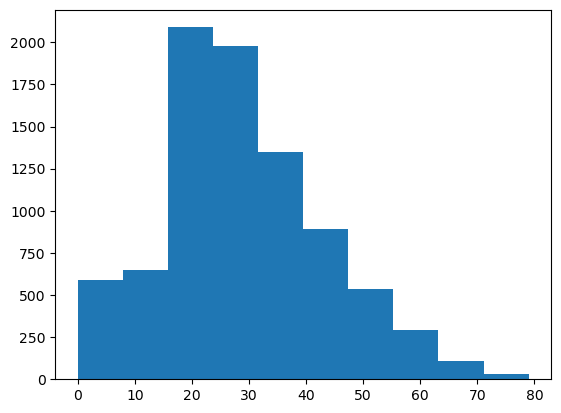

In [486]:
plt.hist(train_data["Age"])

(array([8.156e+03, 2.540e+02, 6.500e+01, 1.700e+01, 9.000e+00, 9.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([    0. ,  1432.7,  2865.4,  4298.1,  5730.8,  7163.5,  8596.2,
        10028.9, 11461.6, 12894.3, 14327. ]),
 <BarContainer object of 10 artists>)

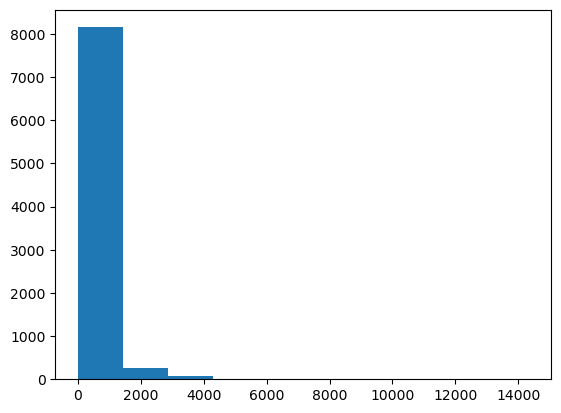

In [487]:
plt.hist(train_data["RoomService"])

(array([8.114e+03, 2.500e+02, 8.000e+01, 3.400e+01, 1.500e+01, 9.000e+00,
        3.000e+00, 1.000e+00, 1.000e+00, 3.000e+00]),
 array([    0. ,  2981.3,  5962.6,  8943.9, 11925.2, 14906.5, 17887.8,
        20869.1, 23850.4, 26831.7, 29813. ]),
 <BarContainer object of 10 artists>)

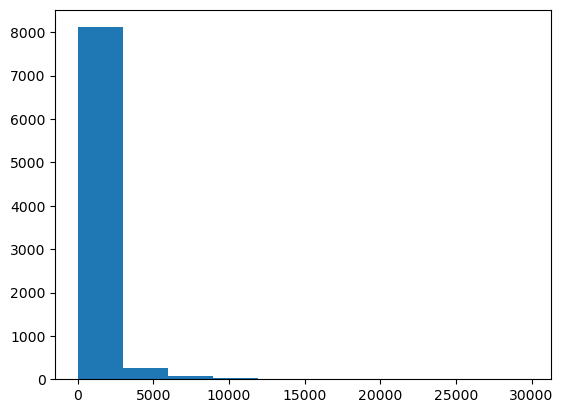

In [488]:
plt.hist(train_data["FoodCourt"])

### Seeing histograms of some numerical fields, it seems more efficient to use mean instead of mode as fields like age represents a normal distribution

In [489]:
for num_col in numerical:
    train_data[num_col] = train_data[num_col].fillna(train_data[num_col].mean())

In [490]:
for num_col in numerical:
    print(num_col, train_data[num_col].isnull().sum())

CryoSleep 0
Age 0
VIP 0
RoomService 0
FoodCourt 0
ShoppingMall 0
Spa 0
VRDeck 0
Transported 0


***
Now removing unique columns such as passengerId as they don't affect the outcome

In [491]:
train1 = train_data

In [492]:
train1 = train_data.drop(columns = ["PassengerId","Cabin","Destination","Transported","Name"])
train1.head()

,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Europa,False,39.00,False,0.00,0.00,0.00,0.00,0.00
1,Earth,False,24.00,False,109.00,9.00,25.00,549.00,44.00
2,Europa,False,58.00,True,43.00,3576.00,0.00,6715.00,49.00
3,Europa,False,33.00,False,0.00,1283.00,371.00,3329.00,193.00
4,Earth,False,16.00,False,303.00,70.00,151.00,565.00,2.00


***
Encoding categorical to numerical

In [493]:
from sklearn.preprocessing import LabelEncoder

In [494]:
columns = list(train1.columns)
columns

['HomePlanet',
 'CryoSleep',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck']

In [495]:
label_encoder = LabelEncoder()
for i in columns:
    if train1[i].dtype != "int32":
        if train1[i].dtype != "float64":
            train1[i] = label_encoder.fit_transform(train1[i])

train1.head()

,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,0,39.00,0,0.00,0.00,0.00,0.00,0.00
1,0,0,24.00,0,109.00,9.00,25.00,549.00,44.00
2,1,0,58.00,1,43.00,3576.00,0.00,6715.00,49.00
3,1,0,33.00,0,0.00,1283.00,371.00,3329.00,193.00
4,0,0,16.00,0,303.00,70.00,151.00,565.00,2.00


***
### Applying standard scaler
because variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. 

In [496]:
from sklearn.preprocessing import StandardScaler

In [497]:
standard = StandardScaler()
x = standard.fit_transform(train1)

In [498]:
train2 = pd.DataFrame(x,columns = [columns])
train2.head()

,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.44,-0.73,0.71,-0.15,-0.34,-0.29,-0.29,-0.28,-0.27
1,-0.82,-0.73,-0.34,-0.15,-0.18,-0.28,-0.25,0.21,-0.23
2,0.44,-0.73,2.03,6.53,-0.28,1.96,-0.29,5.69,-0.23
3,0.44,-0.73,0.29,-0.15,-0.34,0.52,0.33,2.68,-0.10
4,-0.82,-0.73,-0.89,-0.15,0.12,-0.24,-0.04,0.23,-0.27


***
Splitting our dateset to train and test data

In [499]:
from sklearn.model_selection import train_test_split
x = train2
y = train_data["Transported"]

In [500]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30,random_state= 45)

In [501]:
x_test

,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
950,-0.82,1.36,2.03,-0.15,-0.34,-0.29,-0.29,-0.28,-0.27
5288,-0.82,-0.73,-0.34,-0.15,-0.34,-0.21,3.28,-0.28,-0.27
6780,0.44,1.36,0.22,-0.15,-0.34,-0.29,-0.29,-0.28,-0.27
8647,-0.82,1.36,-1.52,-0.15,-0.34,-0.29,-0.29,-0.28,-0.27
1870,-0.82,-0.73,0.08,-0.15,0.01,-0.29,-0.29,-0.03,-0.25
...,...,...,...,...,...,...,...,...,...
2253,-0.82,1.36,-0.76,-0.15,-0.34,-0.29,-0.29,-0.28,-0.27
1956,1.70,-0.73,-0.76,-0.15,-0.30,-0.29,3.58,-0.28,-0.27
1638,-0.82,1.36,0.08,-0.15,-0.34,-0.29,-0.29,-0.28,-0.27
1624,-0.82,1.36,-0.62,-0.15,-0.34,-0.29,-0.29,-0.28,-0.27


# 2. EDA and Visualisation
***

### Visualisation

In [502]:
#seeing how many transported in train_data
tot_trans = train_data['Transported'].value_counts()
tot_trans

True     4378
False    4315
Name: Transported, dtype: int64

In [503]:
percent_trans = str(100*tot_trans/len(train_data))
print(percent_trans)

True    50.36
False   49.64
Name: Transported, dtype: float64


In [504]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.00,8693.00,8693.00,8693.00,8693.00,8693.00
mean,28.83,224.69,458.08,173.73,311.14,304.85
std,14.34,659.74,1594.43,597.42,1124.68,1133.26
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,20.00,0.00,0.00,0.00,0.00,0.00
50%,27.00,0.00,0.00,0.00,0.00,0.00
75%,37.00,78.00,118.00,45.00,89.00,71.00
max,79.00,14327.00,29813.00,23492.00,22408.00,24133.00


In [505]:
train_data.describe(include=['O'])

,PassengerId,HomePlanet,Cabin,Destination,Name
count,8693,8693,8693,8693,8493
unique,8693,3,6560,3,8473
top,0001_01,Earth,G/734/S,TRAPPIST-1e,Gollux Reedall
freq,1,4803,207,6097,2


<AxesSubplot:title={'center':'HomePlanet'}>

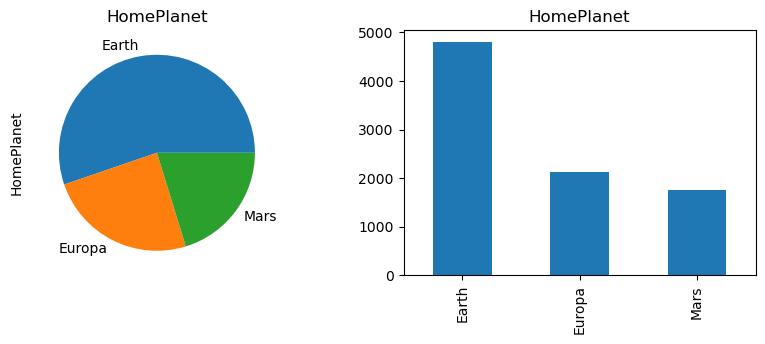

In [506]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
train_data['HomePlanet'].value_counts().plot(kind='pie', title='HomePlanet')
plt.subplot(2,2,2)
train_data['HomePlanet'].value_counts().plot(kind='bar', title='HomePlanet')

<AxesSubplot:title={'center':'Destination'}>

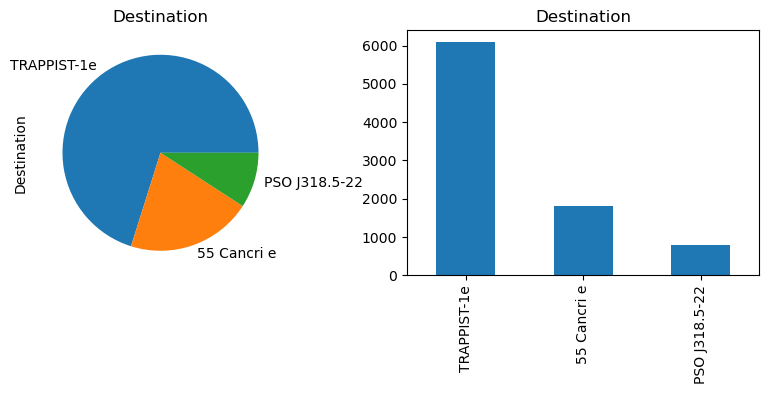

In [507]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
train_data['Destination'].value_counts().plot(kind='pie', title='Destination')
plt.subplot(2,2,2)
train_data['Destination'].value_counts().plot(kind='bar', title='Destination')

<AxesSubplot:title={'center':'CryoSleep'}>

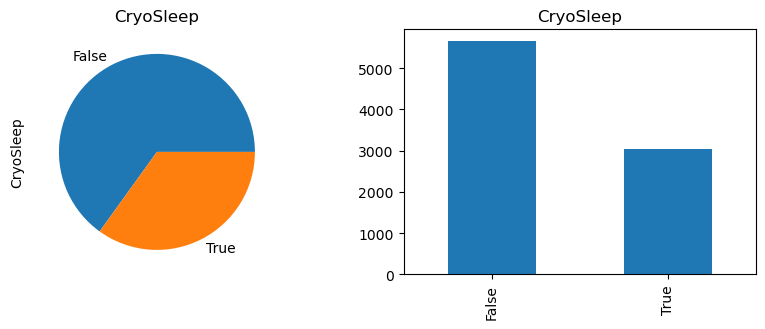

In [508]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
train_data['CryoSleep'].value_counts().plot(kind='pie', title='CryoSleep')
plt.subplot(2,2,2)
train_data['CryoSleep'].value_counts().plot(kind='bar', title='CryoSleep')

<AxesSubplot:title={'center':'VIP'}>

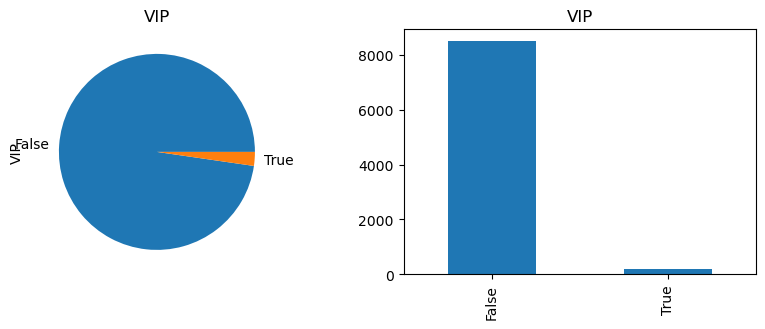

In [509]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
train_data['VIP'].value_counts().plot(kind='pie', title='VIP')
plt.subplot(2,2,2)
train_data['VIP'].value_counts().plot(kind='bar', title='VIP')

In [510]:
!pip install lazypredict

In [511]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [512]:
clf = LazyClassifier(verbose = 0,
                     ignore_warnings = True,
                     custom_metric = None,
                     predictions = False,
                     random_state = 12,
                     classifiers = 'all')
models, predictions = clf.fit(x_train, x_test, y_train, y_test)
models

100%|██████████| 29/29 [00:15<00:00,  1.82it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.80,0.80,0.80,0.80,0.50
RandomForestClassifier,0.79,0.79,0.79,0.79,0.92
SVC,0.79,0.79,0.79,0.79,1.86
AdaBoostClassifier,0.79,0.79,0.79,0.79,0.30
NuSVC,0.79,0.79,0.79,0.79,2.24
LogisticRegression,0.79,0.79,0.79,0.79,0.11
LinearSVC,0.79,0.79,0.79,0.79,0.52
CalibratedClassifierCV,0.79,0.79,0.79,0.79,2.02
XGBClassifier,0.79,0.79,0.79,0.79,0.95


### We can see from the above graph that the LGBMClassifier has the best scores compared to other models.

***
# 3. MODELLING
***

In [513]:
# Pre-Processing
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

def preProcess(x, imputingNulls=True, scaling=True):
    if imputingNulls:
        imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
        x = imputer.fit_transform(x)
    if scaling:
        scaler = StandardScaler()
        x = scaler.fit_transform(x)
    return x

In [514]:
# preprocess training data
x_train = preProcess(x_train, imputingNulls=True)
# preprocess test data
x_test = preProcess(x_test, imputingNulls=True)
# preprocess entire dataset
x_preProcessed = preProcess(x, imputingNulls=True)

***
### Modelling

In [515]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()

In [516]:
model

LGBMClassifier()

In [517]:
model.fit(x_train, y_train)

LGBMClassifier()

In [518]:
model.score(x_test, y_test)

0.8009969325153374

In [519]:
y_pred =model.predict(x_test)

In [520]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.00,False,0.00,0.00,0.00,0.00,0.00,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.00,False,0.00,9.00,0.00,2823.00,0.00,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.00,False,0.00,0.00,0.00,0.00,0.00,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.00,False,0.00,6652.00,0.00,181.00,585.00,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.00,False,10.00,0.00,635.00,0.00,0.00,Brence Harperez


In [521]:
submission = pd.DataFrame()

In [522]:
submission["PassengerId"] = test_data["PassengerId"]

In [523]:
submission


,PassengerId
0,0013_01
1,0018_01
2,0019_01
3,0021_01
4,0023_01
...,...
4272,9266_02
4273,9269_01
4274,9271_01
4275,9273_01


In [524]:
test_data.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [525]:
col = list(test_data.columns)
for i in col:
    if test_data[i].dtype == "float64":
        test_data[i] = test_data[i].fillna(test_data[i].mean())
    else:
        test_data[i] = test_data[i].fillna(test_data[i].mode()[0])

In [526]:
test_data.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

deleting features that are not useful and doesn't change outcomes

In [527]:
test_data = test_data.drop(columns = ["PassengerId","Cabin","Destination","Name"])
test_data.head()

,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,27.00,False,0.00,0.00,0.00,0.00,0.00
1,Earth,False,19.00,False,0.00,9.00,0.00,2823.00,0.00
2,Europa,True,31.00,False,0.00,0.00,0.00,0.00,0.00
3,Europa,False,38.00,False,0.00,6652.00,0.00,181.00,585.00
4,Earth,False,20.00,False,10.00,0.00,635.00,0.00,0.00


In [528]:
col = list(test_data.columns)

In [529]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for i in col:
    if test_data[i].dtype != "int32":
        if test_data[i].dtype != "float64":
            test_data[i] = label_encoder.fit_transform(test_data[i])

test_data.head()

,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0,1,27.00,0,0.00,0.00,0.00,0.00,0.00
1,0,0,19.00,0,0.00,9.00,0.00,2823.00,0.00
2,1,1,31.00,0,0.00,0.00,0.00,0.00,0.00
3,1,0,38.00,0,0.00,6652.00,0.00,181.00,585.00
4,0,0,20.00,0,10.00,0.00,635.00,0.00,0.00


### Pre-Processing training data

In [530]:
x_test = preProcess(test_data, imputingNulls=True)

In [531]:
y_pred = model.predict(x_test)

In [532]:
submission["Transported"] = y_pred

***
# PREDICTION

In [533]:
# Converting our prediction to csv
submission.to_csv("submission.csv",index = None)

In [534]:
pd.read_csv("submission.csv")

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [536]:
print("Successfully submitted predictions to submission.csv")

Successfully submitted predictions to submission.csv
